In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default='notebook'

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump,load



In [4]:
url='https://raw.githubusercontent.com/digipodium/Datasets/main/Position_Salaries.csv'
df= pd.read_csv(url)
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [6]:
x= df[['Level']].values
y= df['Salary'].values

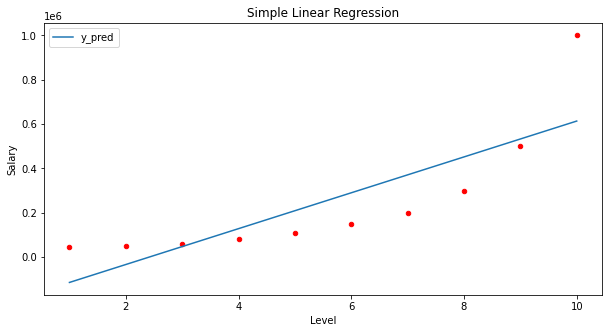

MAE 128454.54545454546
MSE 26695878787.878784
R2 0.6690412331929895


In [12]:
reg1=LinearRegression()
reg1.fit(x,y)
ypred1= reg1.predict(x)
df['y_pred']= ypred1
ax= df.plot(kind='scatter',x='Level',y='Salary',figsize=(10,5), color='red',title='Simple Linear Regression')
df.plot(kind='line', x='Level', y='y_pred',ax=ax)
plt.show()
print('MAE', mean_absolute_error(y,ypred1))
print('MSE', mean_squared_error(y,ypred1))
print("R2", r2_score(y,ypred1))

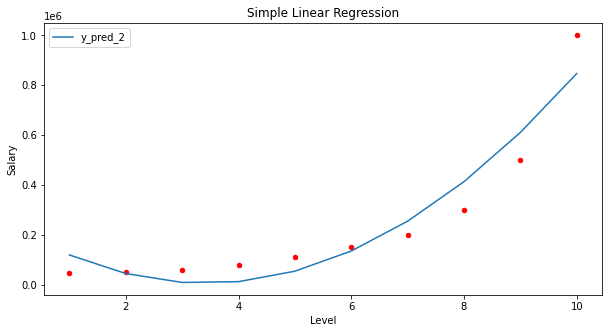

MAE 70218.1818181819
MSE 6758833333.333336
R2 0.9162082221443942


In [14]:
pf= PolynomialFeatures(degree=2)
x_poly= pf.fit_transform(x)

reg1=LinearRegression()
reg1.fit(x_poly ,y)
ypred2= reg1.predict(x_poly)

df['y_pred_2']= ypred2

ax= df.plot(kind='scatter',x='Level',y='Salary',figsize=(10,5), color='red',title='Simple Linear Regression')
df.plot(kind='line', x='Level', y='y_pred_2',ax=ax)
plt.show()
print('MAE', mean_absolute_error(y,ypred2))
print('MSE', mean_squared_error(y,ypred2))
print("R2", r2_score(y,ypred2))

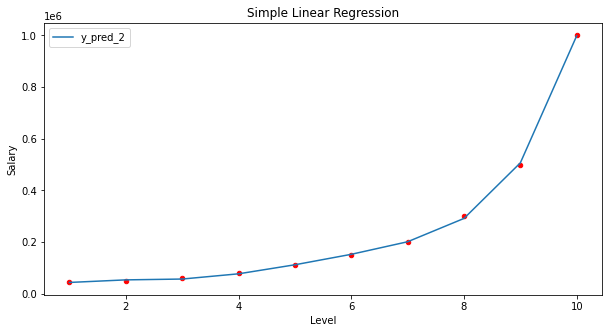

MAE 3360.839160905867
MSE 16382284.382291112
R2 0.9997969027099753


In [22]:
pf= PolynomialFeatures(degree=5)
x_poly= pf.fit_transform(x)

reg1=LinearRegression()
reg1.fit(x_poly ,y)
ypred2= reg1.predict(x_poly)

df['y_pred_2']= ypred2

ax= df.plot(kind='scatter',x='Level',y='Salary',figsize=(10,5), color='red',title='Simple Linear Regression')
df.plot(kind='line', x='Level', y='y_pred_2',ax=ax)
plt.show()
print('MAE', mean_absolute_error(y,ypred2))
print('MSE', mean_squared_error(y,ypred2))
print("R2", r2_score(y,ypred2))

In [32]:
def Polynomial(deg):
    pf= PolynomialFeatures(degree=deg)
    x_poly= pf.fit_transform(x)

    reg1=LinearRegression()
    reg1.fit(x_poly ,y)
    ypred2= reg1.predict(x_poly)

    df['y_pred_2']= ypred2

    # ax= df.plot(kind='scatter',x='Level',y='Salary',figsize=(10,5), color='red',title='Simple Linear Regression')
    # df.plot(kind='line', x='Level', y='y_pred_2',ax=ax)
    # plt.show()
    r2=r2_score(y,ypred2)
    r2=r2*100
    return r2

In [33]:
deg=2
r2=Polynomial(deg)
while True:
    if r2 >= 99.99: 
        break
    else:
        deg=deg+1
        r2=Polynomial(deg)

print("Degree = ",deg)
    


    
    

Degree =  6
